
# **HEllo  its  day 9  today we have 2022 Europe Economy Gap Analysis**


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
##import data set 
data=pd.read_csv("/content/Economy_Indicators.csv")

## first_five _rows of data 
data.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24


In [4]:
## data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    42 non-null     object 
 1   GDP                        42 non-null     int64  
 2   GDP Year-over-Year         42 non-null     float64
 3   GDP Quarter-over-Quarterr  42 non-null     object 
 4   Interest Rate              42 non-null     object 
 5   Inflation Rate             42 non-null     float64
 6   Jobless Rate               42 non-null     float64
 7   Gov. Budget                42 non-null     float64
 8   Debt/GDP                   42 non-null     float64
 9   Current Account            42 non-null     float64
 10  Population                 42 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.7+ KB


In [5]:
## replace na value with nan
data.replace('           NA',np.nan,regex=True,inplace=True)

In [6]:
# change dtype of data 
data['GDP Quarter-over-Quarterr']=data['GDP Quarter-over-Quarterr'].astype(float)
data['Interest Rate']=data['Interest Rate'].astype(float)

In [7]:
# cheaking dtype again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    42 non-null     object 
 1   GDP                        42 non-null     int64  
 2   GDP Year-over-Year         42 non-null     float64
 3   GDP Quarter-over-Quarterr  40 non-null     float64
 4   Interest Rate              41 non-null     float64
 5   Inflation Rate             42 non-null     float64
 6   Jobless Rate               42 non-null     float64
 7   Gov. Budget                42 non-null     float64
 8   Debt/GDP                   42 non-null     float64
 9   Current Account            42 non-null     float64
 10  Population                 42 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.7+ KB


In [8]:
data.drop(0,axis=0,inplace=True)

In [9]:
# columns _name
columns_of_data=data.columns

In [10]:
columns_of_data

Index(['Country', 'GDP', 'GDP Year-over-Year', 'GDP Quarter-over-Quarterr',
       'Interest Rate', 'Inflation Rate', 'Jobless Rate', 'Gov. Budget',
       'Debt/GDP', 'Current Account', 'Population'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

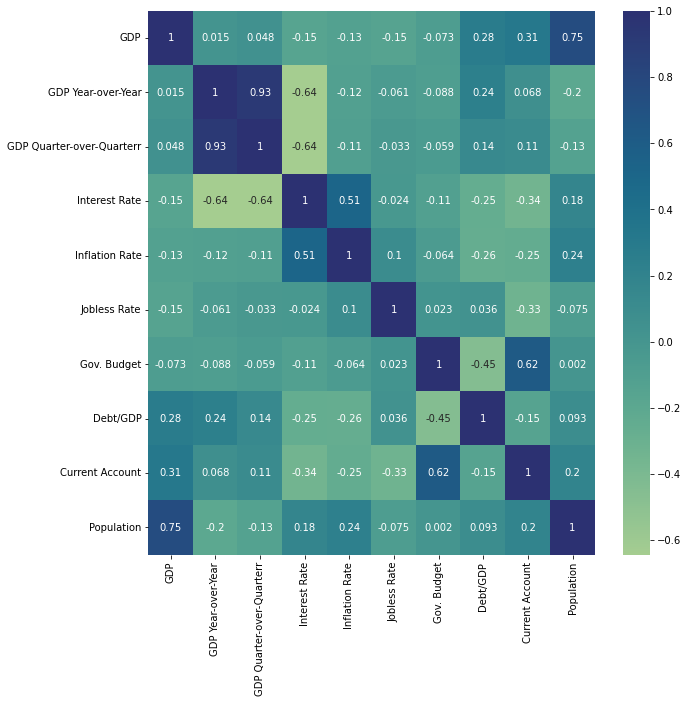

In [11]:
# plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='crest')
plt.show

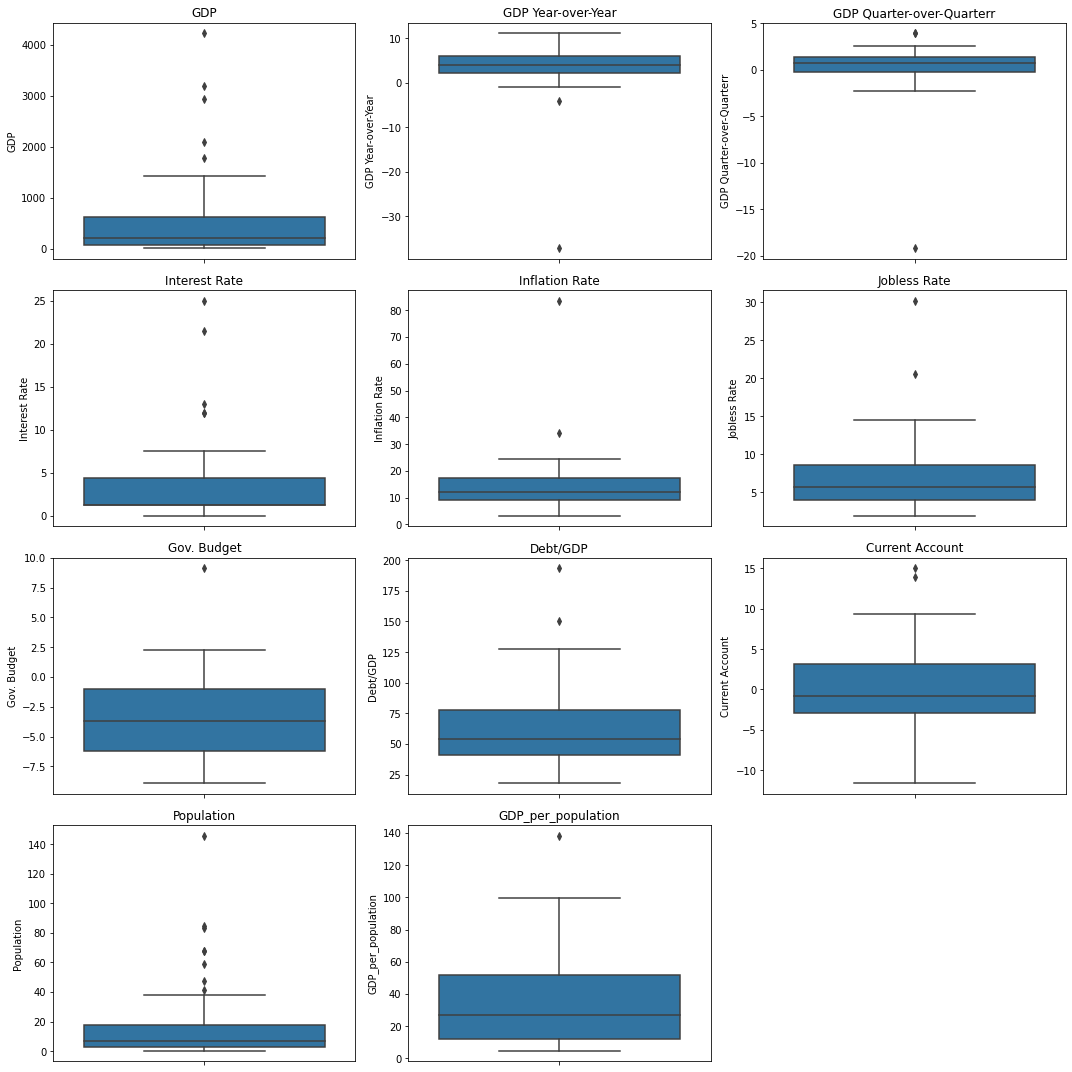

In [40]:
fig = plt.figure(figsize=(15,15))

for i in range(len(sc_columns)):
    plt.subplot(4,3,i+1)
    plt.title(sc_columns[i])
    sns.boxplot(data=data,y=data[sc_columns[i]])

plt.tight_layout()
plt.show()

In [12]:
#create column for gdp per population
data['GDP_per_population']=data['GDP']/data['Population']

In [13]:
data.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population,GDP_per_population
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16,50.781626
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53,47.193840
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63,43.427473
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24,35.449021
5,Russia,1776,-4.1,-0.8,7.50,13.7,3.8,0.8,18.2,6.8,145.55,12.201992


In [14]:
#drop country column 
data1=data.drop('Country',axis=1)

In [15]:
# apply stanndard scaler 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(data1)
sc_data=pd.DataFrame(data_sc,columns=data1.columns)
sc_data.head()

,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population,GDP_per_population
0,3.846347,-0.218101,-0.012351,-0.518409,-0.407589,-0.313684,-0.048173,0.139586,1.260818,2.056473,0.515659
1,2.746518,0.168014,0.017020,-0.335355,-0.415627,-0.701941,-0.706537,0.850752,-0.475029,1.545797,0.395459
2,2.481115,0.139413,0.105131,-0.518409,-0.761264,0.055161,-0.849659,1.305256,0.045725,1.549065,0.269276
3,1.592547,0.253818,0.281354,-0.518409,-0.496008,0.132812,-1.050031,2.318534,0.410253,1.274940,0.001977
4,1.248584,-1.047535,-0.276685,0.625679,-0.110180,-0.643702,1.239930,-1.226602,1.156667,4.094928,-0.776859


In [16]:
# fill missing value with 0
sc_data.fillna(0,inplace=True)

In [17]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4,random_state=1)
model.fit(sc_data)

KMeans(n_clusters=4, random_state=1)

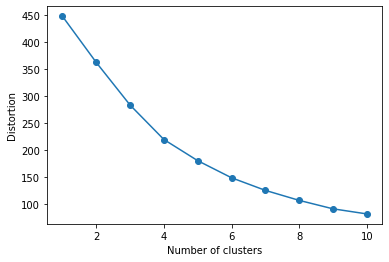

In [18]:
distorians=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=0)
  km.fit(sc_data)
  distorians.append(km.inertia_)
plt.plot(range(1,11),distorians,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

we divided data into 4 cluster 

In [19]:
data['cluster']=model.labels_

In [20]:
data.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population,GDP_per_population,cluster
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16,50.781626,2
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53,47.193840,2
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63,43.427473,2
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24,35.449021,2
5,Russia,1776,-4.1,-0.8,7.50,13.7,3.8,0.8,18.2,6.8,145.55,12.201992,2


In [21]:
data.groupby('cluster').mean()

,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population,GDP_per_population
cluster,,,,,,,,,,,
0,560.428571,4.600000,0.957143,1.271429,8.585714,3.914286,1.242857,41.542857,9.442857,7.634286,86.693691
1,200.000000,-37.200000,-19.200000,25.000000,24.600000,10.600000,-3.400000,48.900000,-1.300000,41.000000,4.878049
2,2608.000000,3.000000,0.433333,2.458333,9.516667,6.746667,-4.916667,94.250000,2.566667,78.418333,36.519541
3,178.666667,4.415926,0.617600,4.408846,17.633333,7.898889,-4.466667,63.779259,-2.762963,9.778148,22.968111


In [22]:
sc_data.columns

Index(['GDP', 'GDP Year-over-Year', 'GDP Quarter-over-Quarterr',
       'Interest Rate', 'Inflation Rate', 'Jobless Rate', 'Gov. Budget',
       'Debt/GDP', 'Current Account', 'Population', 'GDP_per_population'],
      dtype='object')

In [23]:
sc_columns=sc_data.columns

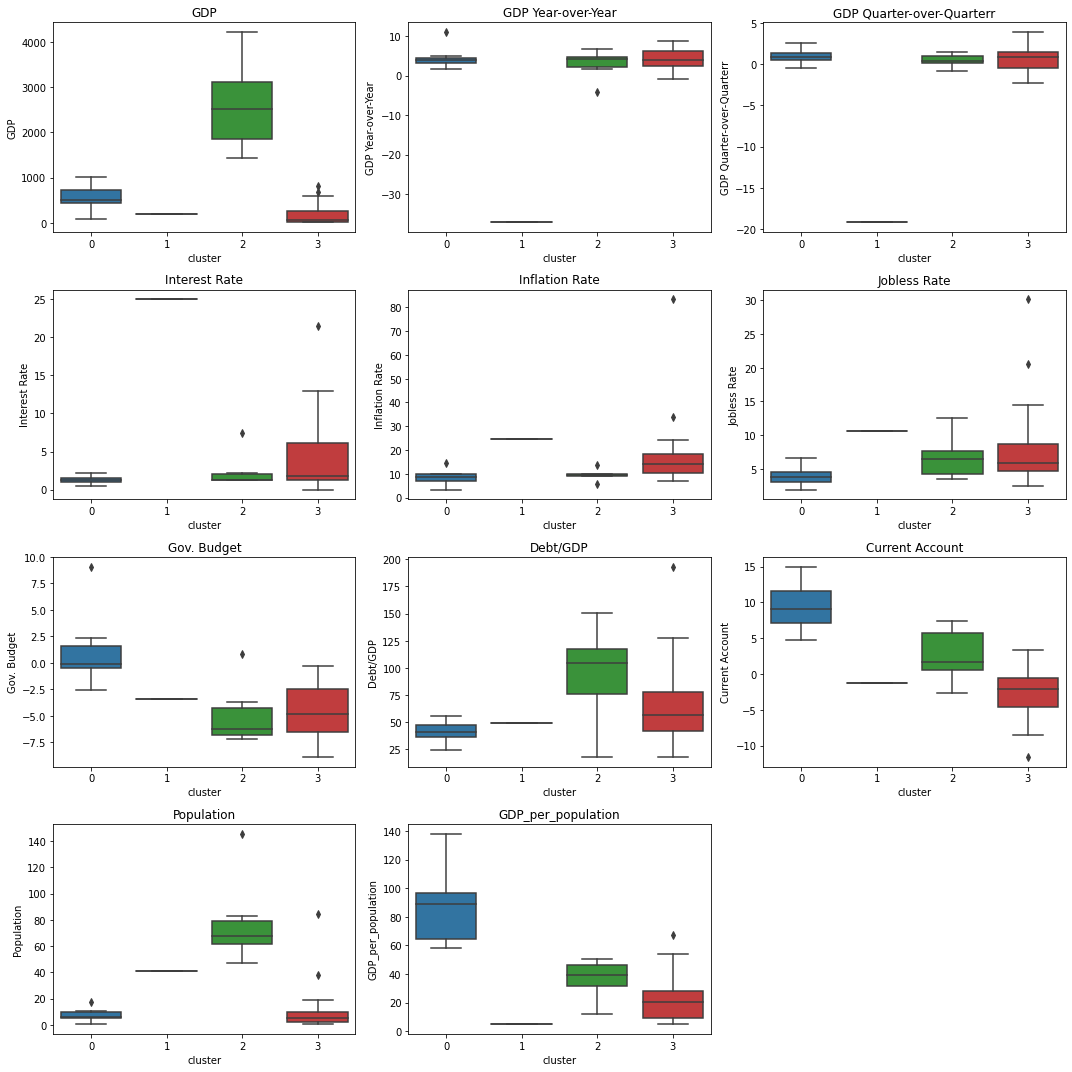

In [24]:
fig=plt.figure(figsize=(15,15))
for i in range(len(sc_columns)):
  plt.subplot(4,3,i+1)
  plt.title(sc_columns[i])
  sns.boxplot(data=data,y=data[sc_columns[i]],x=data['cluster'])
plt.tight_layout()
plt.show()

cluster 0 include countries which are not so large in gdps and population but large in gdp per capita 

In [25]:
zero=data[data['cluster']==0]

In [26]:
one=data[data['cluster']==1]

In [27]:
two=data[data['cluster']==2]

In [28]:
three=data[data['cluster']==3]

# apply pca

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
pca.fit(sc_data)
feature = pca.transform(sc_data)

In [30]:
data['PCA1']=feature[:,0]
data['PCA2']=feature[:,1]
data['PCA3']=feature[:,2]

In [32]:
data.groupby('cluster')['PCA1','PCA2','PCA3'].mean().T.style.bar(axis=1)

<ipython-input-32-8fad2546b2c5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('cluster')['PCA1','PCA2','PCA3'].mean().T.style.bar(axis=1)


cluster,0,1,2,3
PCA1,-2.125776,7.186638,-0.712561,0.443302
PCA2,1.706276,4.453737,0.746248,-0.773154
PCA3,-1.185858,-0.015407,2.825202,-0.319807


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


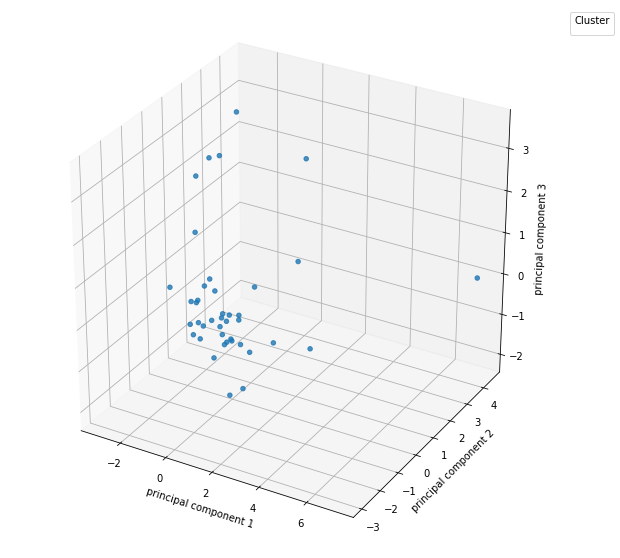

In [35]:
fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter=ax.scatter(data['PCA1'], data['PCA2'],data['PCA3'],alpha=0.8,c )
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster0','Cluster1','Cluster2','Cluster3'],
           title="Cluster",loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
